Cryptocurrencies are fast becoming rivals to traditional currency across the world. 
The digital currencies are available to purchase in many different places, making it accessible to everyone, and with retailers accepting various cryptocurrencies it could be a sign that money as we know it is about to go through a major change.

In addition, the blockchain technology on which many cryptocurrencies are based, with its revolutionary distributed digital backbone, has many other promising applications. Implementations of secure, decentralized systems can aid us in conquering organizational issues of trust and security that have plagued our society throughout the ages. In effect, we can fundamentally disrupt industries core to economies, businesses and social structures, eliminating inefficiency and human error.

Content The dataset contains all historical daily prices (open, high, low, close) for all cryptocurrencies listed on CoinMarketCap.

In [59]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import math
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")

In [60]:
import statsmodels.api as sm
from pmdarima import auto_arima
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error, mean_absolute_error

ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

In [4]:
df = pd.read_csv("all_currencies.csv")
df.head()

,Unnamed: 0,Date,Symbol,Open,High,Low,Close,Volume,Market Cap
0,0,2015-11-12,$$$,0.000013,0.000017,0.000013,0.000017,142.0,NaN
1,1,2015-11-13,$$$,0.000017,0.000033,0.000016,0.000024,85.0,NaN
2,2,2015-11-14,$$$,0.000024,0.000053,0.000023,0.000030,131.0,NaN
3,3,2015-11-15,$$$,0.000030,0.000063,0.000022,0.000035,132.0,NaN
4,4,2015-11-16,$$$,0.000035,0.000046,0.000032,0.000036,280.0,NaN


In [5]:
df.tail()

,Unnamed: 0,Date,Symbol,Open,High,Low,Close,Volume,Market Cap
645779,189,2018-05-29,ZZC,0.097595,0.101948,0.082738,0.083027,590.0,189967.0
645780,190,2018-05-30,ZZC,0.083082,0.118589,0.056165,0.082957,263.0,161719.0
645781,191,2018-05-31,ZZC,0.082941,0.123240,0.082536,0.121377,52.0,161444.0
645782,192,2018-06-01,ZZC,0.071372,0.102548,0.071372,0.100614,47.0,138924.0
645783,193,2018-06-02,ZZC,0.100570,0.100657,0.059969,0.089404,63.0,195759.0


In [6]:
df.sample()

,Unnamed: 0,Date,Symbol,Open,High,Low,Close,Volume,Market Cap
177728,1074,2017-02-22,DOPE,0.000937,0.000937,0.000839,0.000849,206.0,132243.0


In [7]:
# Basic Exploration
print("Dataset Shape:", df.shape)

Dataset Shape: (645784, 9)


In [8]:
print("Column Data Types:")
print(df.dtypes)

Column Data Types:
Unnamed: 0      int64
Date           object
Symbol         object
Open          float64
High          float64
Low           float64
Close         float64
Volume        float64
Market Cap    float64
dtype: object


In [9]:
# Drop unnecessary column
df.drop('Unnamed: 0', axis=1, inplace=True)

In [10]:
# Missing Values
print("Missing Values")
print(df.isnull().sum())

Missing Values
Date              0
Symbol            0
Open              0
High              0
Low               0
Close             0
Volume         5756
Market Cap    84485
dtype: int64


In [11]:
print("Unique Cryptocurrencies:")
print(df['Symbol'].nunique())

Unique Cryptocurrencies:
877


In [12]:
print("Sample of each crypto:")
df['Symbol'].value_counts()

Sample of each crypto:


Symbol
NMC     1862
BTC     1862
LTC     1862
NVC     1861
PPC     1861
        ... 
KST       35
VIPS      33
TTT       31
BCI       31
PLAN      30
Name: count, Length: 877, dtype: int64

In [13]:
# Check for duplicates
print("Duplicate rows:", df.duplicated().sum())

Duplicate rows: 0


In [14]:
# Statistical summary
print("Statistical Summary:")
df.describe().T

Statistical Summary:


,count,mean,std,min,25%,50%,75%,max
Open,645784.0,1.838564e+02,8.697238e+03,2.500000e-09,0.000495,0.006627,7.903150e-02,2.298390e+06
High,645784.0,2.230398e+02,1.142367e+04,3.200000e-09,0.000581,0.007638,9.116875e-02,2.926100e+06
Low,645784.0,1.467489e+02,6.328668e+03,2.300000e-09,0.000430,0.005809,6.937925e-02,2.030590e+06
Close,645784.0,1.821590e+02,8.585699e+03,2.500000e-09,0.000496,0.006635,7.906125e-02,2.300740e+06
Volume,640028.0,7.048649e+06,1.929721e+08,0.000000e+00,29.000000,403.000000,7.803250e+03,2.384090e+10
Market Cap,561299.0,1.990142e+08,4.089282e+09,0.000000e+00,24589.500000,161452.000000,1.452460e+06,3.261410e+11


In [15]:
# basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 645784 entries, 0 to 645783
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Date        645784 non-null  object 
 1   Symbol      645784 non-null  object 
 2   Open        645784 non-null  float64
 3   High        645784 non-null  float64
 4   Low         645784 non-null  float64
 5   Close       645784 non-null  float64
 6   Volume      640028 non-null  float64
 7   Market Cap  561299 non-null  float64
dtypes: float64(6), object(2)
memory usage: 39.4+ MB


## Filtering only the BTC Data

In [16]:
# Filter only BTC data
df_btc = df[df['Symbol'] == 'BTC'].copy()
df_btc = df_btc.reset_index(drop=True)

In [17]:
df_btc = df_btc.drop(['Market Cap', 'Volume'], axis=1)
df_btc = df_btc.reset_index(drop=True)

In [18]:
df_btc.head()

,Date,Symbol,Open,High,Low,Close
0,2013-04-28,BTC,135.30,135.98,132.10,134.21
1,2013-04-29,BTC,134.44,147.49,134.00,144.54
2,2013-04-30,BTC,144.00,146.93,134.05,139.00
3,2013-05-01,BTC,139.00,139.89,107.72,116.99
4,2013-05-02,BTC,116.38,125.60,92.28,105.21


In [19]:
df_btc.tail()

,Date,Symbol,Open,High,Low,Close
1857,2018-05-29,BTC,7129.46,7526.42,7090.68,7472.59
1858,2018-05-30,BTC,7469.73,7573.77,7313.60,7406.52
1859,2018-05-31,BTC,7406.15,7608.90,7361.13,7494.17
1860,2018-06-01,BTC,7500.70,7604.73,7407.34,7541.45
1861,2018-06-02,BTC,7536.72,7695.83,7497.26,7643.45


In [20]:
df_btc.sample()

,Date,Symbol,Open,High,Low,Close
1614,2017-09-28,BTC,4197.13,4279.31,4109.7,4174.73


In [21]:
df_btc.describe()

,Open,High,Low,Close
count,1862.000000,1862.000000,1862.000000,1862.000000
mean,1873.425215,1939.293974,1800.072691,1877.180569
std,3314.255163,3452.230665,3145.814136,3316.299695
min,68.500000,74.560000,65.530000,68.430000
25%,284.730000,290.825000,280.642500,285.240000
50%,562.535000,575.140000,532.625000,563.155000
75%,1049.080000,1080.110000,1027.457500,1048.822500
max,19475.800000,20089.000000,18974.100000,19497.400000


In [22]:
df_btc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1862 entries, 0 to 1861
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1862 non-null   object 
 1   Symbol  1862 non-null   object 
 2   Open    1862 non-null   float64
 3   High    1862 non-null   float64
 4   Low     1862 non-null   float64
 5   Close   1862 non-null   float64
dtypes: float64(4), object(2)
memory usage: 87.4+ KB


In [23]:
print('BTC Dataset Shape')
df_btc.shape

BTC Dataset Shape


(1862, 6)

In [24]:
print(f"\nMissing Values:")
df_btc.isnull().sum()


Missing Values:


Date      0
Symbol    0
Open      0
High      0
Low       0
Close     0
dtype: int64

In [25]:
# Check for duplicates
df_btc.duplicated().sum()

np.int64(0)

In [26]:
# Converts the Date column from object type to datetime format
df_btc.Date = pd.to_datetime(df_btc['Date'])

In [27]:
df_btc.Date.min(), df_btc.Date.max()

(Timestamp('2013-04-28 00:00:00'), Timestamp('2018-06-02 00:00:00'))

In [28]:
df_btc.Date.max()-df_btc.Date.min()

Timedelta('1861 days 00:00:00')

In [29]:
df_btc.set_index('Date', inplace=True)

## Visualization 

<Figure size 1500x600 with 0 Axes>

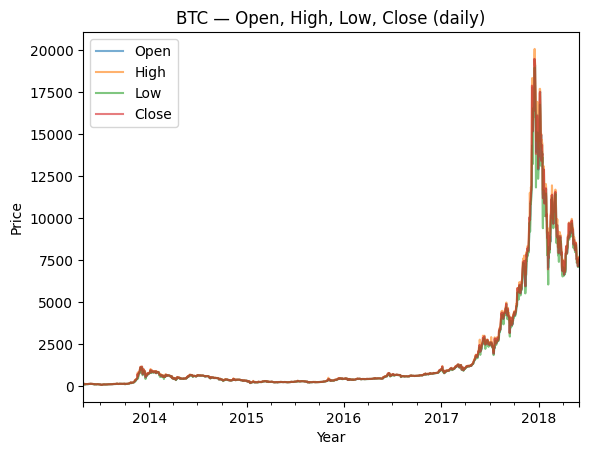

In [30]:
# Plot OHLC on one chart (transparent lines)
plt.figure(figsize=(15,6))
df_btc[['Open','High','Low','Close']].plot(alpha=0.6)
plt.title('BTC — Open, High, Low, Close (daily)')
plt.ylabel('Price')
plt.xlabel('Year')
plt.legend()
plt.show()

### Rolling mean & rolling std (30-day) to inspect non-stationarity/volatility

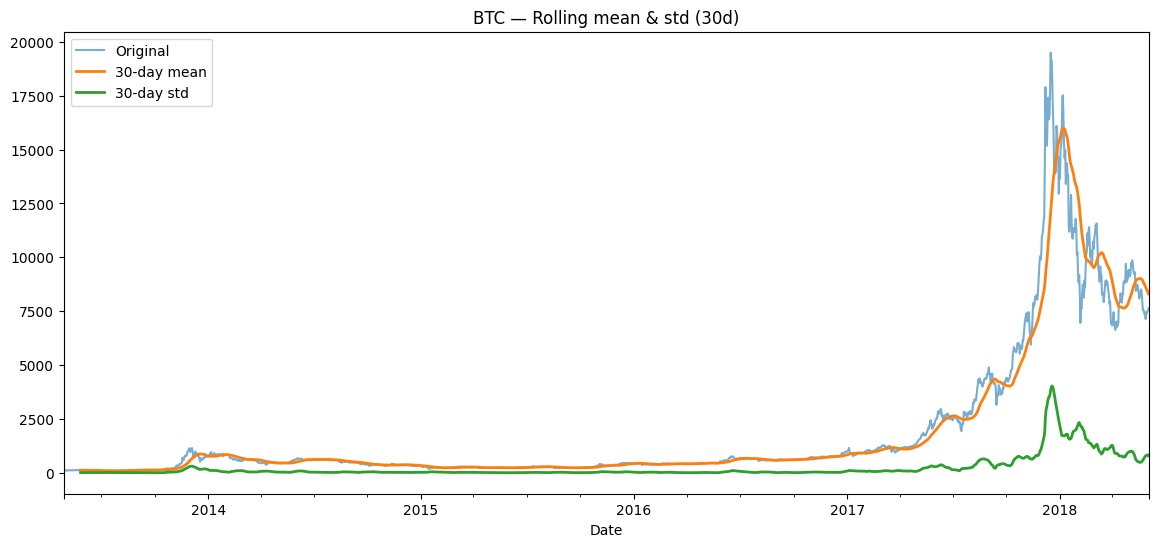

In [31]:
y = df_btc['Close'].dropna()
rol_mean = y.rolling(window=30).mean()
rol_std = y.rolling(window=30).std()

plt.figure(figsize=(14,6))
y.plot(label='Original', alpha=0.6)
rol_mean.plot(label='30-day mean', linewidth=2)
rol_std.plot(label='30-day std', linewidth=2)
plt.title('BTC — Rolling mean & std (30d)')
plt.legend()
plt.show()


Key Insights

BTC was relatively stable until 2016.
Huge price surge and volatility in 2017 (bubble-like behavior).
Post-2018, prices dropped but volatility persisted for a while.
Rolling mean and std are useful for detecting trends and risk.

### Boxplot by year and by month (seasonality / yearly distribution)

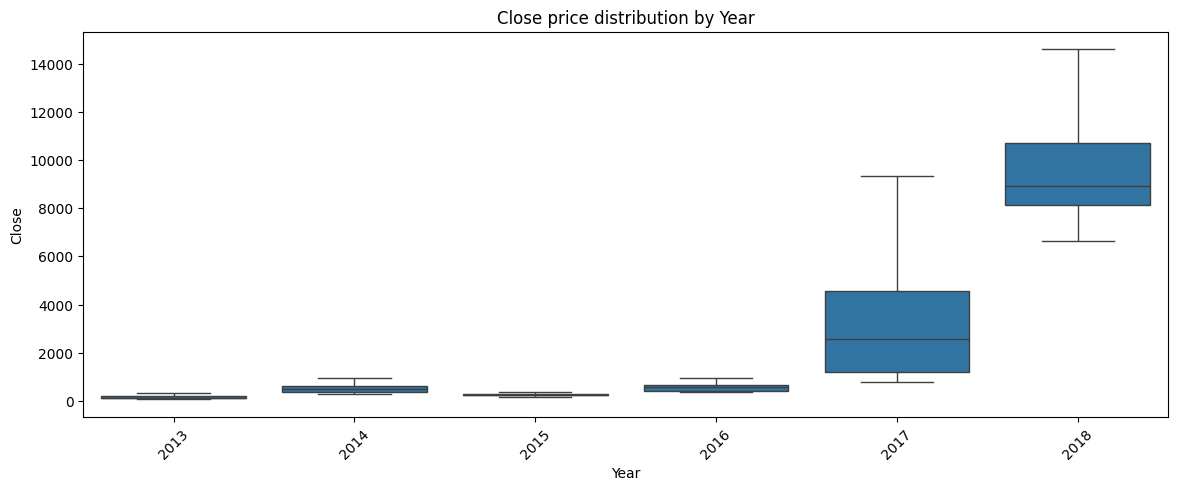

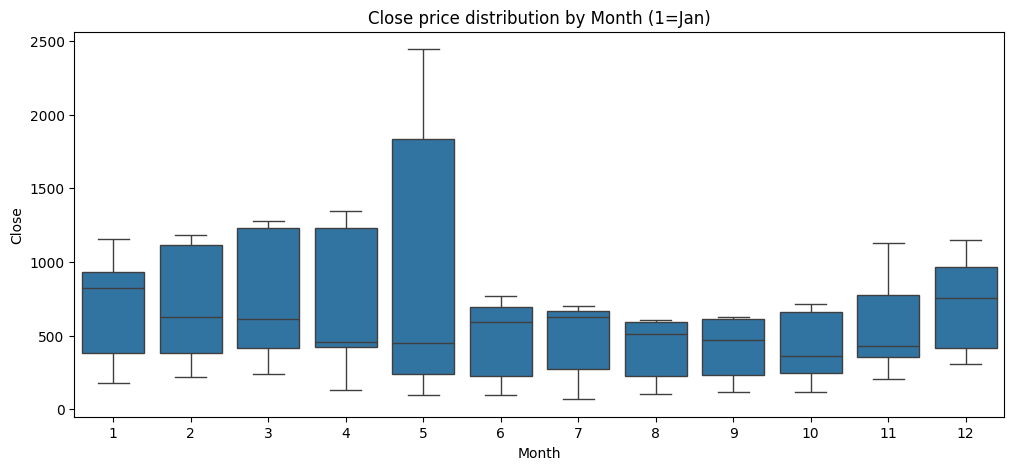

In [32]:
# Ensure we have Year & Month columns for grouping
df_btc['Year'] = df_btc.index.year
df_btc['Month'] = df_btc.index.month

plt.figure(figsize=(14,5))
sns.boxplot(x='Year', y='Close', data=df_btc.reset_index(), showfliers=False)  # showfliers=False to remove outliers
plt.title('Close price distribution by Year')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12,5))
sns.boxplot(x='Month', y='Close', data=df_btc.reset_index(), showfliers=False)  # showfliers=False to remove outliers
plt.title('Close price distribution by Month (1=Jan)')
plt.show()


Before checking for stationarity:
I want to visually understand the time series structure.
The seasonal decomposition helps us separate:
Trend → long-term movement
Seasonality → repeating short-term pattern
Residual → stationary component (the noise)

### Seasonal Decomposition and Stationary Check

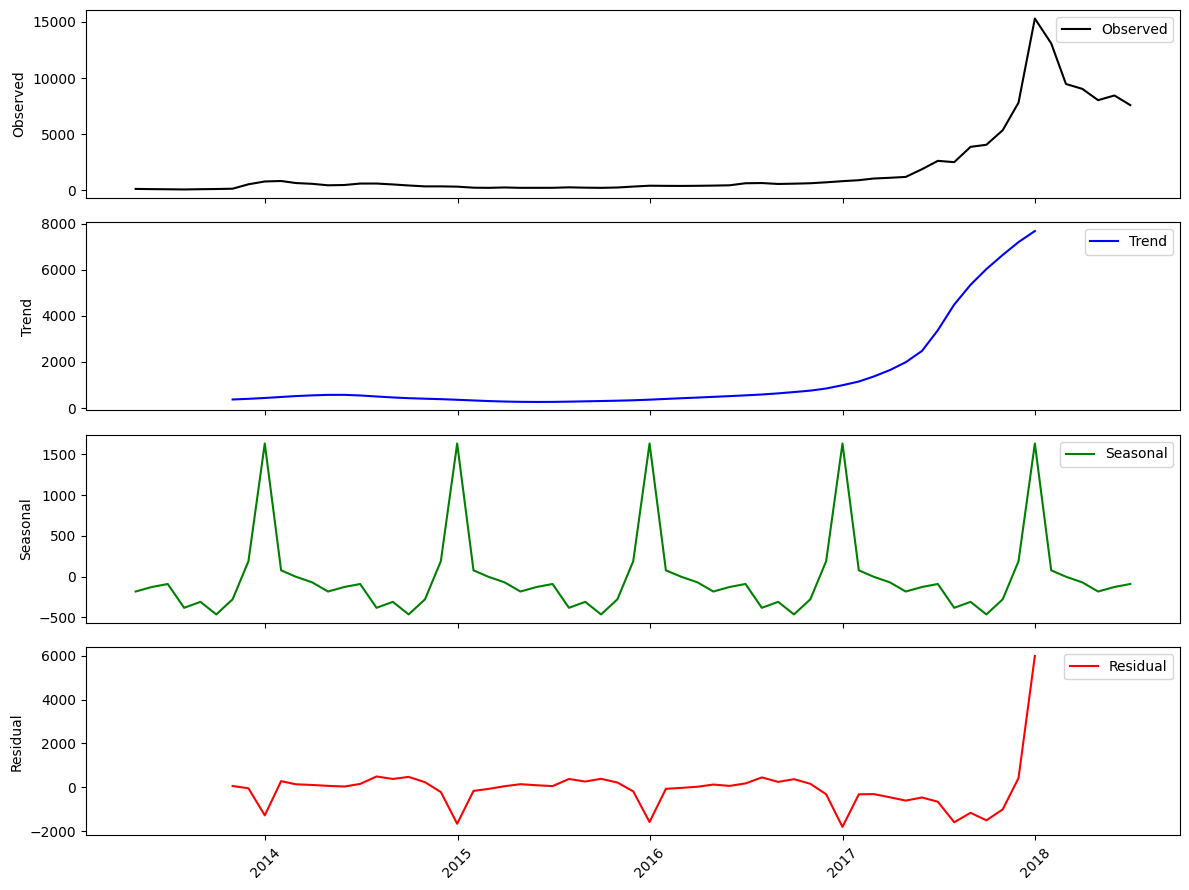

In [36]:
from statsmodels.tsa.seasonal import seasonal_decompose

# 1. Ensure data is sorted by Date
df_btc = df_btc.sort_index()

# 2. Resample to monthly frequency (you can also try weekly = 'W')
monthly_close = df_btc['Close'].resample('M').mean().dropna()


# 3. Perform seasonal decomposition (period=12 → yearly seasonality for monthly data)
result = seasonal_decompose(monthly_close, model='additive', period=12)

# 4. Plot the components manually
fig, axes = plt.subplots(4, 1, figsize=(12, 9), sharex=True)

# Observed
axes[0].plot(monthly_close, label='Observed', color='black')
axes[0].set_ylabel('Observed')
axes[0].legend()

# Trend
axes[1].plot(result.trend, label='Trend', color='blue')
axes[1].set_ylabel('Trend')
axes[1].legend()

# Seasonal
axes[2].plot(result.seasonal, label='Seasonal', color='green')
axes[2].set_ylabel('Seasonal')
axes[2].legend()

# Residual
axes[3].plot(result.resid, label='Residual', color='red')
axes[3].set_ylabel('Residual')
axes[3].legend()

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Observed (Top Panel)

This is the original time series data.
It starts relatively flat from 2013 to around 2016, then shows a sharp increase in 2017, peaking in early 2018, followed by a decline.
This suggests a major upward shift in the underlying phenomenon during the later period.

Trend (Second Panel)

The trend line is mostly flat until around 2016, then begins to rise sharply from 2017 onward.
This indicates a long-term growth pattern, likely driven by structural changes or external factors.

Seasonal (Third Panel)

The seasonal component shows repeating spikes at regular intervals (roughly yearly).
These spikes suggest strong seasonality, possibly linked to annual events or cycles.

Residual (Bottom Panel)

Residuals are relatively stable until late 2017, then show large positive deviations in early 2018.
This means that the model could not fully explain the sudden surge, indicating an anomaly or unexpected event.

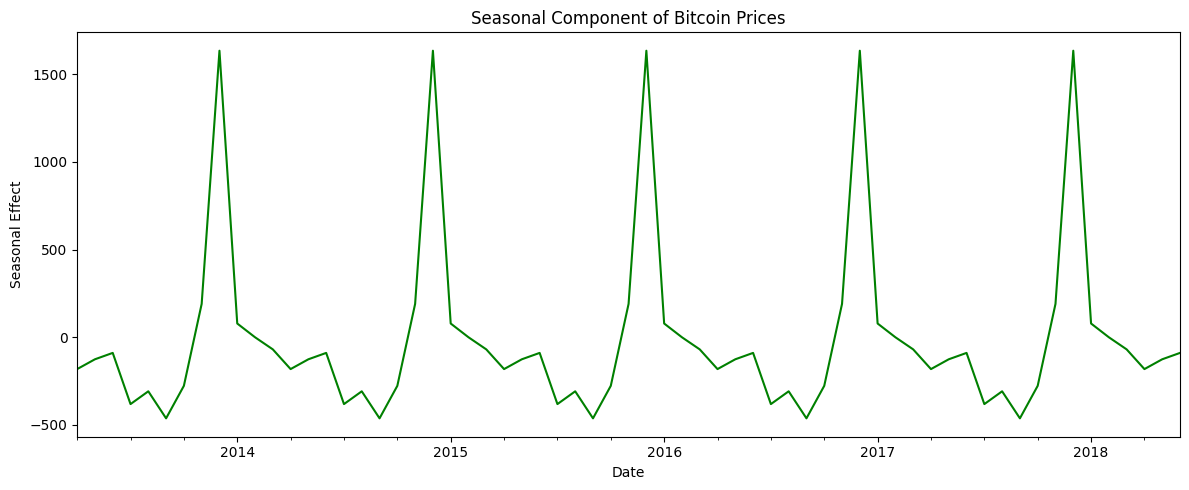

In [37]:
# Plot only the seasonal component
result.seasonal.plot(title='Seasonal Component of Bitcoin Prices', figsize=(12,5), color='green')
plt.xlabel('Date')
plt.ylabel('Seasonal Effect')
plt.tight_layout()
plt.show()


Bitcoin prices are not purely random; they exhibit predictable seasonal fluctuations.

The sharpness of peaks suggests that certain months or periods are highly influential—possibly linked to investor behavior or global events.

# Autocorrelation visuals (ACF & PACF) for raw Close (it will help me understand serial correlation before differencing)

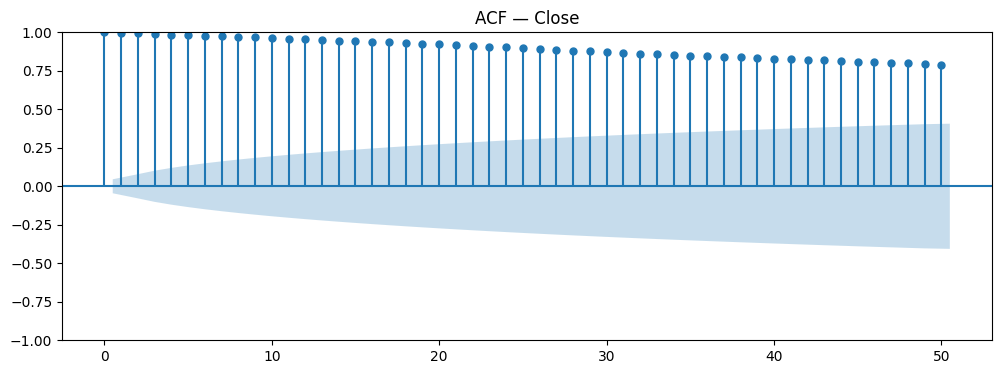

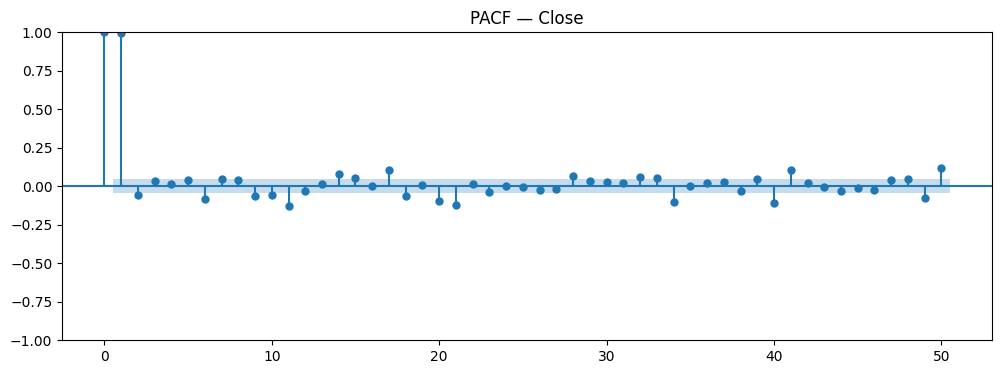

In [44]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure(figsize=(12,4))
plot_acf(df_btc['Close'].dropna(), lags=50, ax=plt.gca())
plt.title('ACF — Close')
plt.show()

plt.figure(figsize=(12,4))
plot_pacf(df_btc['Close'].dropna(), lags=50, ax=plt.gca(), method='ywm')
plt.title('PACF — Close')
plt.show()


### ACF (first chart) - In my chart, the bars stay very high for many lags → today’s price is strongly linked to past prices for a long time.
### This means the series is not stationary (it has a trend).

### PACF (second chart)

### Here, the first bar is very tall, the second is smaller, and then almost flat →
### Only the last 1–2 days matter most after differencing.

### Perform the Augmented Dickey-Fuller (ADF) Test
### To check if the time series is stationary or not

In [39]:
from statsmodels.tsa.stattools import adfuller

# Use the same monthly data we decomposed
y = df_btc['Close'].resample('M').mean().dropna()

# Perform ADF Test
result_adf = adfuller(y)

print('ADF Statistics: %f' %result_adf[0])
print('p-value: %f' %result_adf[1])
print('Critical Values:')
for key, value in result_adf[4].items():
    print(f'   {key}: {value:.3f}')

# Quick interpretation
if result_adf[1] < 0.05:
    print("\n The series is stationary (reject H0).")
else:
    print("\n The series is NOT stationary (fail to reject H0).")

ADF Statistics: -0.156922
p-value: 0.943465
Critical Values:
   1%: -3.563
   5%: -2.919
   10%: -2.597

 The series is NOT stationary (fail to reject H0).


------------------------------------------------------------------------------------------------------------------
🔹 1. ADF Statistic = -0.1569

This is my test statistic.
It’s compared against the critical values at 1%, 5%, and 10% significance levels.

If my ADF statistic is less than (i.e., more negative than) the critical value → reject H₀ → stationary.

If my ADF statistic is greater than the critical value → fail to reject H₀ → non-stationary.

Here:
-0.1569 > -2.919 (5% level) → fail to reject H₀ → non-stationary.

🔹 2. p-value = 0.943

This is the probability of observing the data if the series were stationary.

A high p-value (like 0.94) means there’s strong evidence for non-stationarity.

It’s almost certain my series has a trend or seasonality.

🔹 3. Critical Values

These are reference thresholds:

Significance level	Critical value	Interpretation
1%	-3.563	Very strict threshold
5%	-2.919	Standard confidence
10%	-2.597	Lenient threshold

Your ADF statistic (-0.1569) is greater than all of them, so at any confidence level (1%, 5%, 10%), the test says its not stationary.

# Since it is not Stationary

## I am Apply First-Order Differencing

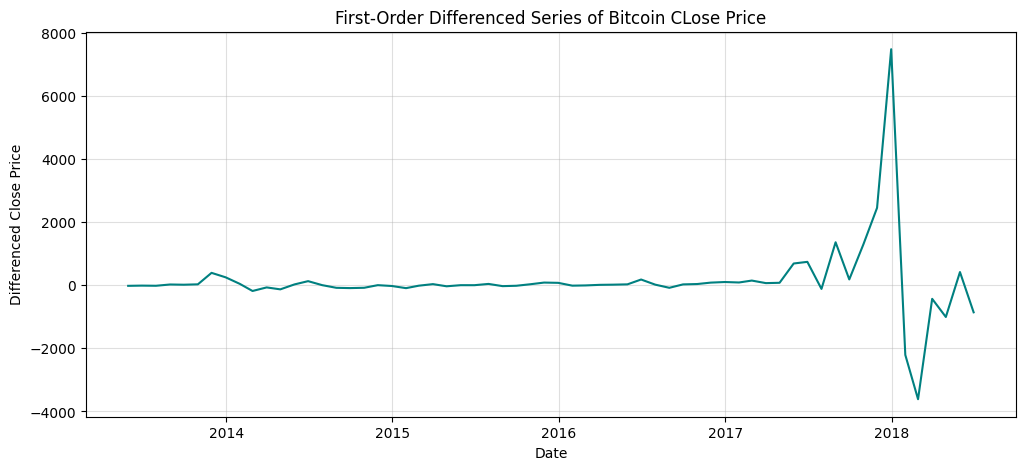

In [40]:
# First-order differencing
y_diff1 = y.diff().dropna()

# Plot the differenced series
plt.figure(figsize=(12,5))
plt.plot(y_diff1, color='teal')
plt.title('First-Order Differenced Series of Bitcoin CLose Price')
plt.xlabel('Date')
plt.ylabel('Differenced Close Price')       
plt.grid(True, alpha=0.4)
plt.show()

From the first-order differenced series, we can see:

The trend component is mostly removed (the line now fluctuates around zero).

However, there are still large spikes around 2017–2018, meaning the variance might not be stable yet — that’s a clue the series may still not be fully stationary.

## Check Stationarity Again (ADF Test)

In [41]:
from statsmodels.tsa.stattools import adfuller

result_adf_diff1 = adfuller(y_diff1)
print('ADF Statistic (1st Difference):', result_adf_diff1[0])
print('p-value:', result_adf_diff1[1])
print('Critical Values:')
for key, value in result_adf_diff1[4].items():
    print(f'   {key}: {value:.3f}')

if result_adf_diff1[1] < 0.05:
    print("\n The differenced series is stationary (reject H0).")
else:
    print("\n Still not stationary. Consider 2nd differencing or log transformation.")


ADF Statistic (1st Difference): -2.397604787587296
p-value: 0.14241358124207792
Critical Values:
   1%: -3.563
   5%: -2.919
   10%: -2.597

 Still not stationary. Consider 2nd differencing or log transformation.


---------------------------------------------------------------------------------------------------------------------------------
My ADF Statistic (-2.39) is still greater (less negative) than the 5% critical value (-2.919).

The p-value (0.142) is > 0.05, so we still fail to reject the null hypothesis.
→ Therefore, even after 1st differencing, your series is not yet stationary.


Start with log + 1st difference, because Bitcoin’s prices usually have multiplicative trends.

If that’s still not stationary, we’ll do 2nd differencing next.

## (second differencing) can make the model over-differenced — it might become too stationary, removing useful information about structure and hurting predictive accuracy.

### Financial data (like crypto prices) almost always grows exponentially — variance increases as the price rises.

### A log transform stabilizes variance and converts multiplicative relationships into additive ones — making patterns easier for ARIMA/SARIMA models to capture.

### First differencing after the log removes the remaining linear trend, leaving you with a series whose mean and variance are both roughly constant (a requirement for stationarity).

### It’s statistically cleaner and easier to interpret: differences in log values ≈ percentage change in price.

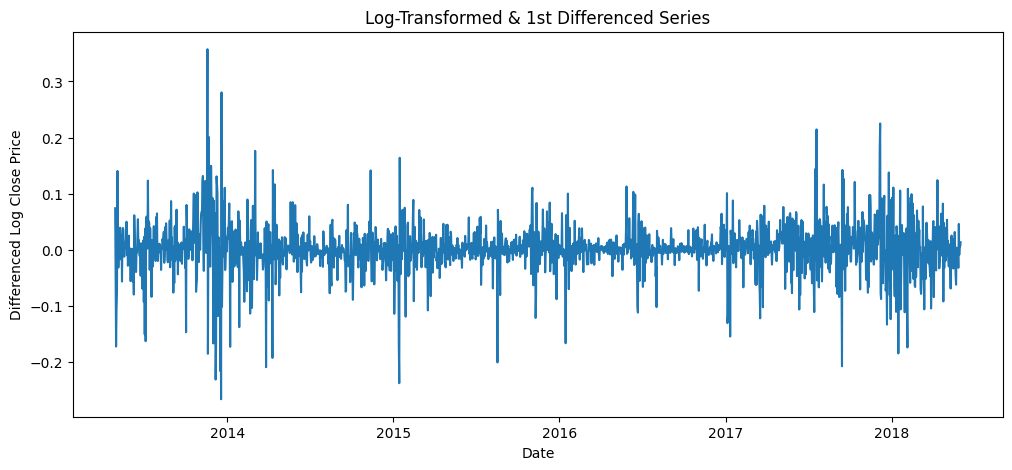

In [42]:
# Applying log trannsformation
btc_log = np.log(df_btc['Close'])

# 1st differencing of logged data
btc_log_diff1 = btc_log.diff().dropna()

# Plot
plt.figure(figsize=(12, 5))
plt.plot(btc_log_diff1)
plt.title('Log-Transformed & 1st Differenced Series')
plt.xlabel('Date')
plt.ylabel('Differenced Log Close Price')
plt.show()

Mean is roughly constant → The series oscillates around zero without drifting upward or downward.

Variance is relatively constant → Fluctuations don’t systematically increase or decrease over time.

No obvious trend or seasonality → That’s precisely what we want for ARIMA-type modeling.

Occasional spikes are fine — that’s natural volatility in Bitcoin prices.

In [43]:
# ADF test
result_adf_logdiff1 = adfuller(btc_log_diff1)
print('ADF Statistic (Log + 1st Difference):', result_adf_logdiff1[0])
print('p-value:', result_adf_logdiff1[1])
for key, value in result_adf_logdiff1[4].items():
    print(f'   {key}: {value:.3f}')

if result_adf_logdiff1[1] < 0.05:
    print("\n Stationary after log transformation and differencing.")
else:
    print("\n Still not stationary. Try 2nd differencing or seasonal differencing.")


ADF Statistic (Log + 1st Difference): -7.8000519000124635
p-value: 7.535345555324438e-12
   1%: -3.434
   5%: -2.863
   10%: -2.568

 Stationary after log transformation and differencing.


| Metric                    | Meaning                                                                                                                                    |
| ------------------------- | ------------------------------------------------------------------------------------------------------------------------------------------ |
| **ADF Statistic = -7.80** | This is *much* lower (more negative) than the critical values (-3.43, -2.86, -2.56), which means strong evidence of stationarity.          |
| **p-value = 7.5e-12**     | Way below 0.05 — so you **reject the null hypothesis** (H₀: the series has a unit root / is non-stationary).                               |
| **Conclusion**            | Your transformed Bitcoin Close series is **now stationary** — mean and variance are constant over time. Perfect for ARIMA-family models.  |


### Decomposition Plot (After Log + 1st Differencing)

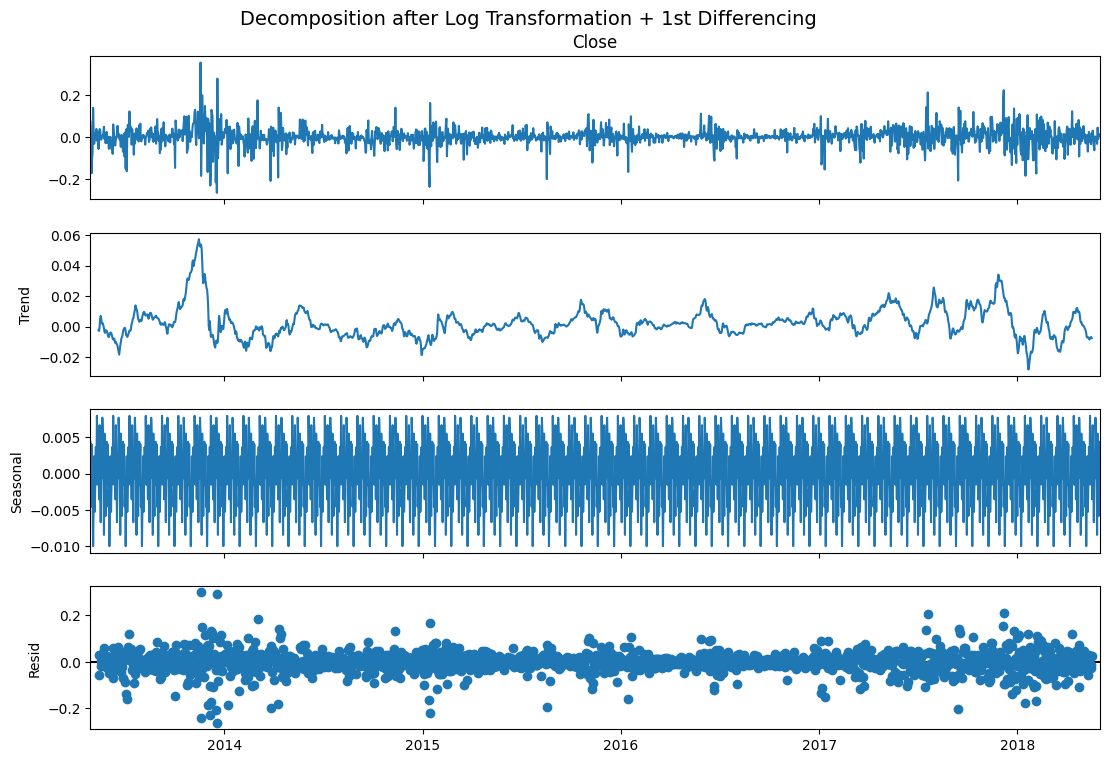

In [50]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Decomposition after Log + 1st Differencing
decomposition_logdiff1 = seasonal_decompose(btc_log_diff1.dropna(), model='additive', period=30)

# Plot the decomposition
fig = decomposition_logdiff1.plot()
fig.set_size_inches(12, 8)
plt.suptitle('Decomposition after Log Transformation + 1st Differencing', fontsize=14)
plt.show()


Interpretation of the “Log + 1st Differencing” decomposition

Observed (top panel) –
The series now fluctuates around zero, without a clear upward or downward drift.
-> This confirms stationarity visually.

Trend component –
The trend line is now nearly flat and oscillates around zero, meaning no long-term upward or downward pattern remains.
-> That’s exactly what we wanted — the trend has been effectively removed.

Seasonal component –
You can still see short, repetitive oscillations — this is normal for crypto data (daily/weekly trading patterns).
-> However, if you find this too strong, we can handle it with seasonal differencing (optional).

Residual component –
The residuals look random (no visible structure or drift).
-> This is a good sign — it means the series is now suitable for ARIMA-type modeling.

#### Visuals are just guides, not decisions. So the decomposition after log + first differencing shows a small, repeating seasonal signal — but visual amplitude is small compared to noise. Visuals alone can mislead: small but consistent seasonality can still affect forecasts, or it may be negligible and force an unnecessary seasonal difference that hurts forecast accuracy.

#### Over-differencing is dangerous. Seasonal differencing when not required removes signal and inflates variance of parameter estimates — hurting out-of-sample accuracy.

### Plotting ACF/PACF including seasonal lags (so I can visually spot seasonal spikes at e.g. lag 7 for weekly or lag 30 for monthly on daily data):

# Plot ACF and PACF for btc_log_diff1

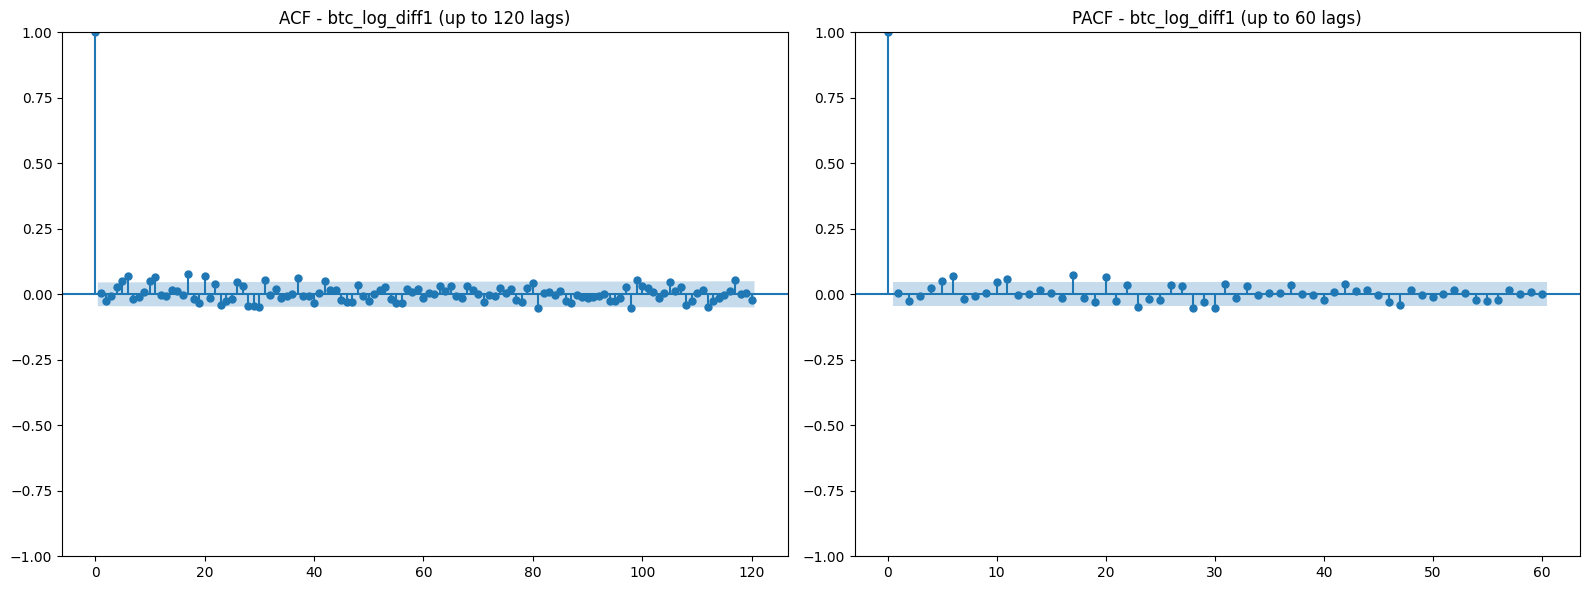

In [53]:

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

series = btc_log_diff1.dropna()

fig, axes = plt.subplots(1, 2, figsize=(16,6))

# ACF (longer lags to reveal seasonal structure)
plot_acf(series, lags=120, ax=axes[0])
axes[0].set_title('ACF - btc_log_diff1 (up to 120 lags)')

# PACF
plot_pacf(series, lags=60, ax=axes[1], method='ywm')
axes[1].set_title('PACF - btc_log_diff1 (up to 60 lags)')

plt.tight_layout()
plt.show()


Interpretation

ACF Plot (left):
Almost all spikes are inside the confidence bands after lag 0 →

-> This means no strong autocorrelation remains → the series is not seasonal anymore and is stationary.

PACF Plot (right):
Same pattern — all lags are very small and inside the band →

-> This confirms that both the AR and MA effects are already minimal.

### Since both ACF and PACF show no clear seasonal spikes,
### I do not need any further seasonal differencing.
### My series is now clean, stable, and non-seasonal —
### ready for modeling.

# Finding the Best ARIMA Parameters Automatically

In [55]:
from pmdarima import auto_arima

# Fit auto_arima model on your log-transformed close prices
auto_model = auto_arima(
    btc_log,                # Original log-transformed series (not differenced)
    start_p=0, start_q=0,
    max_p=5, max_q=5,
    d=1,                    # We already know 1st differencing worked
    seasonal=False,         # No seasonality detected from ACF/PACF
    stepwise=True,
    trace=True,
    error_action='ignore',
    suppress_warnings=True,
    information_criterion='aic'  # Choose based on AIC
)

print(auto_model.summary())

ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject